In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


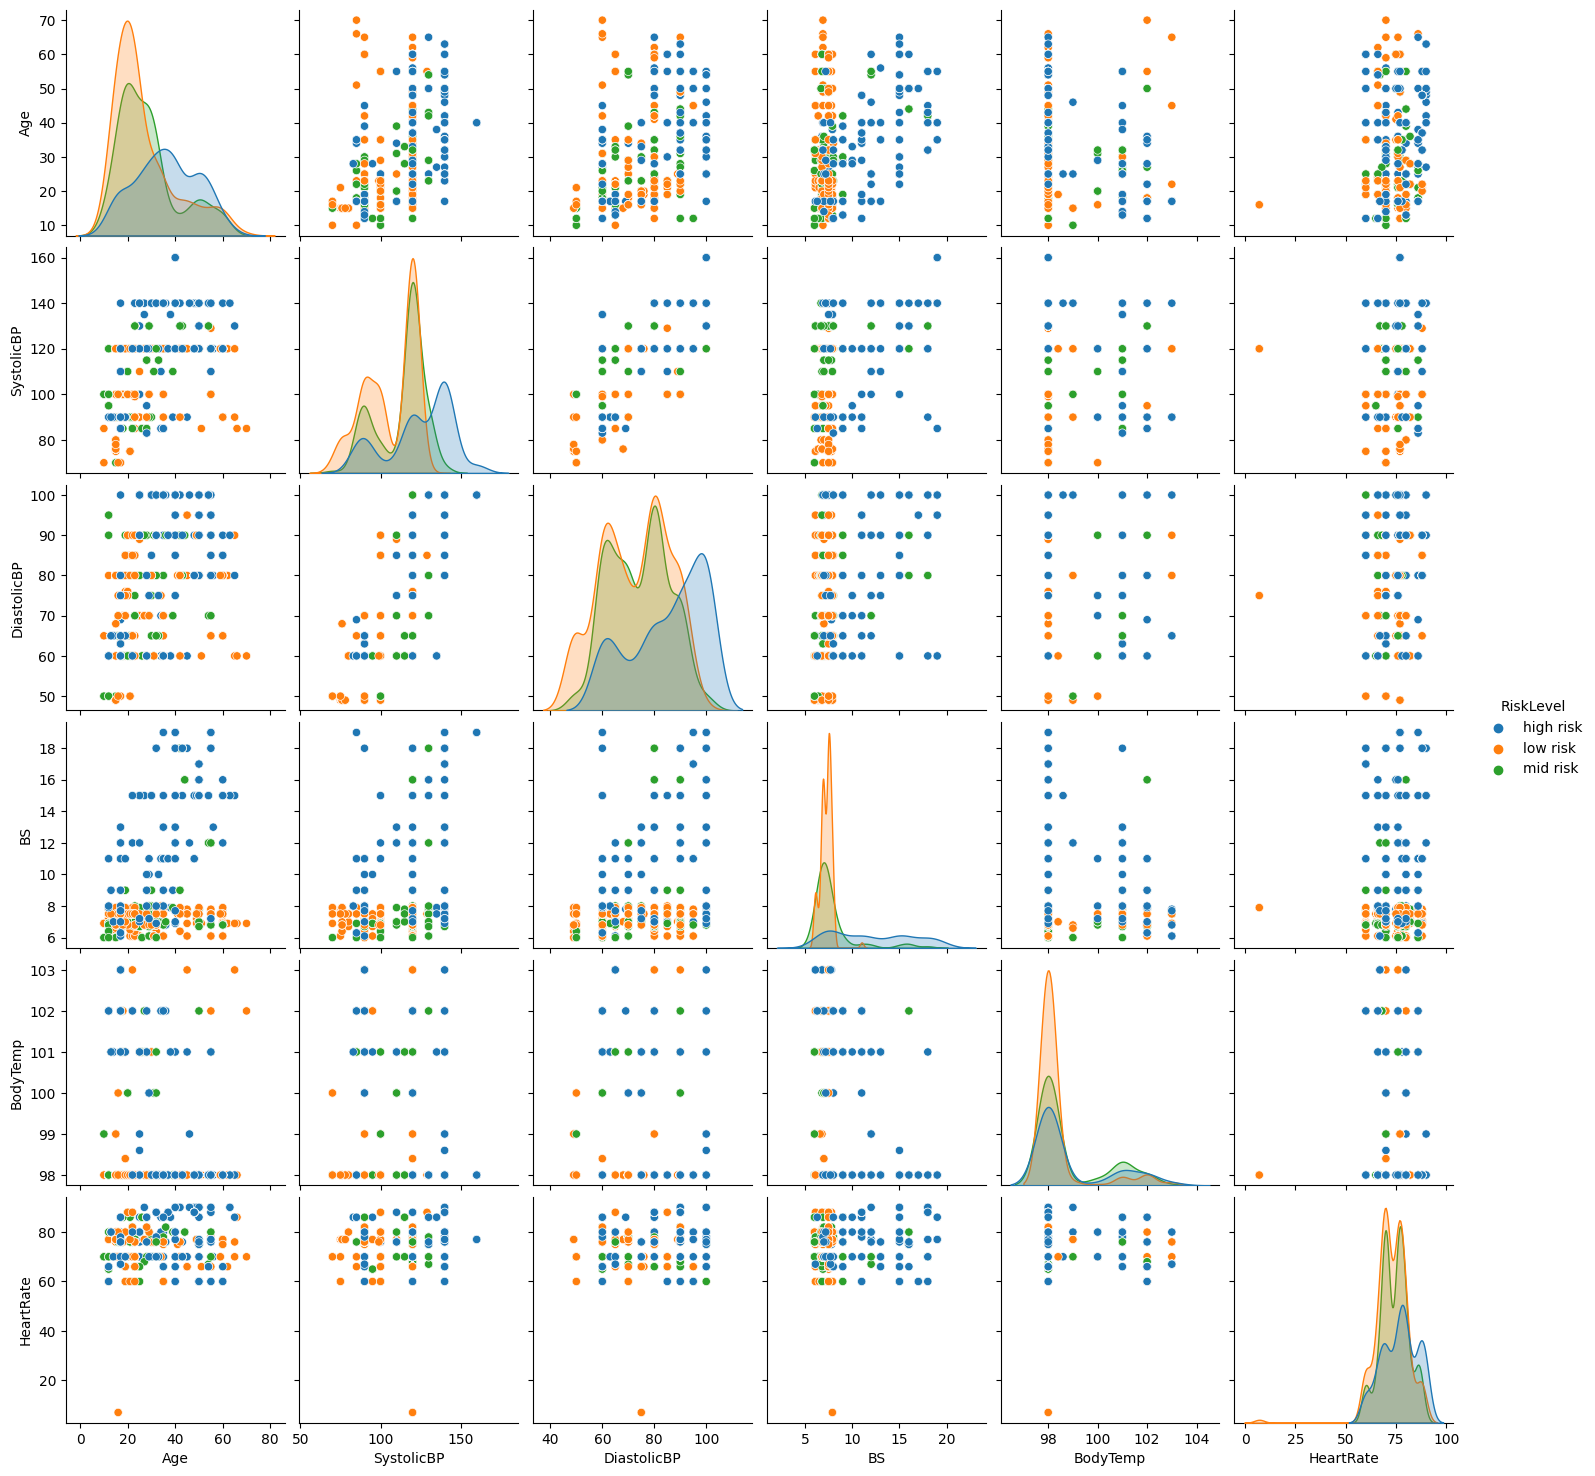

In [ ]:
g = sns.pairplot(df,hue= "RiskLevel")

In [ ]:
df["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
df["RiskLevel"] = df["RiskLevel"].replace('low risk',0).replace('mid risk',1).replace('high risk',2)

In [ ]:
y = df["RiskLevel"]
x = df.drop(["RiskLevel"],axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3, max_depth = 2, random_state = 42)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=42)

In [ ]:
y_pred = rfc.predict(x_test)

VISUALIZATION

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)
DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)
DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


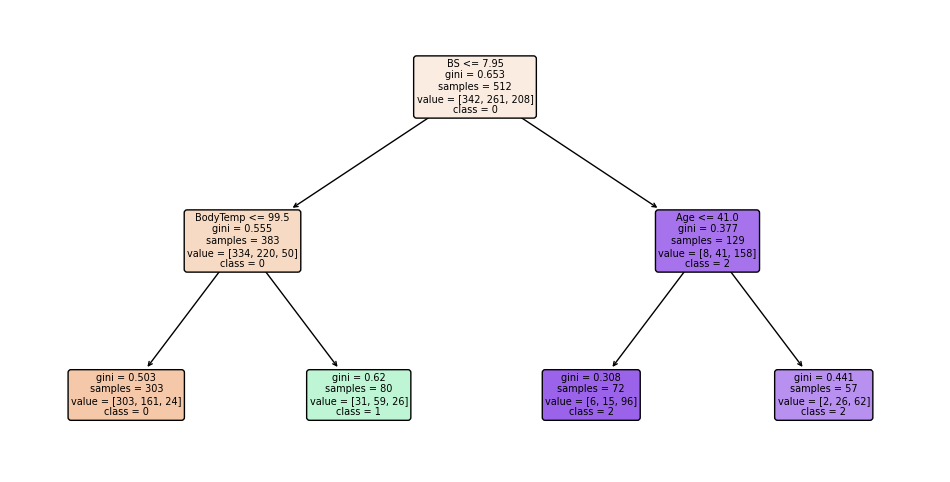

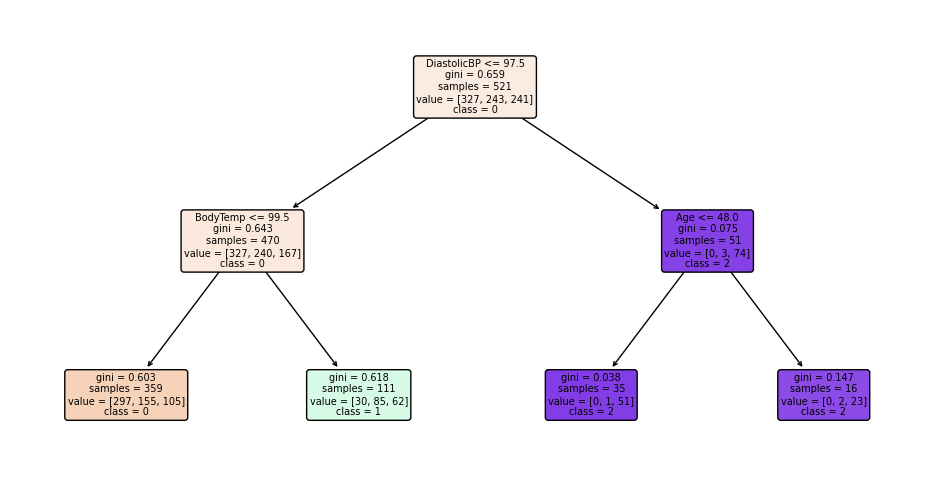

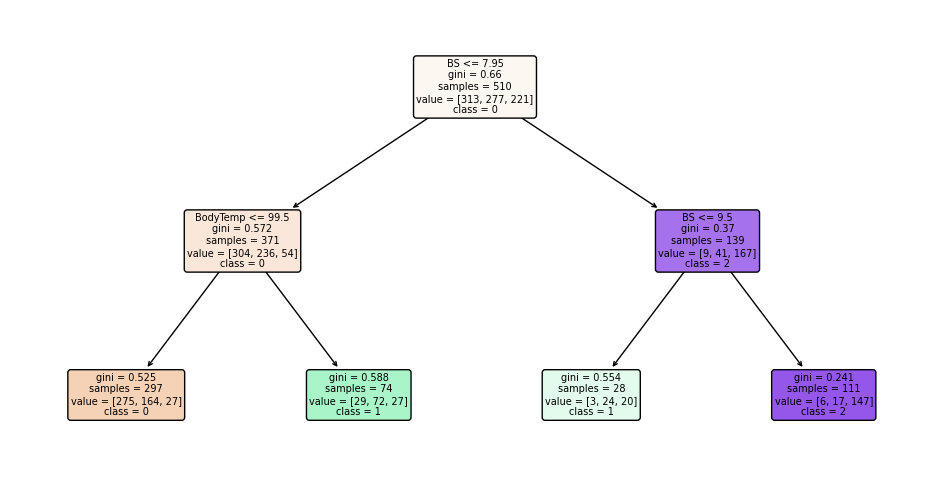

In [ ]:
from dateutil.relativedelta import TU
from sklearn import tree

features = x.columns.values
classes = ["0","1","2"]

for estimator in rfc.estimators_:
  print(estimator)
  plt.figure(figsize=(12,6))
  tree.plot_tree(estimator,
                 feature_names = features,
                 class_names = classes,
                 fontsize = 7,
                 filled = True,
                 rounded = True)
plt.show()

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



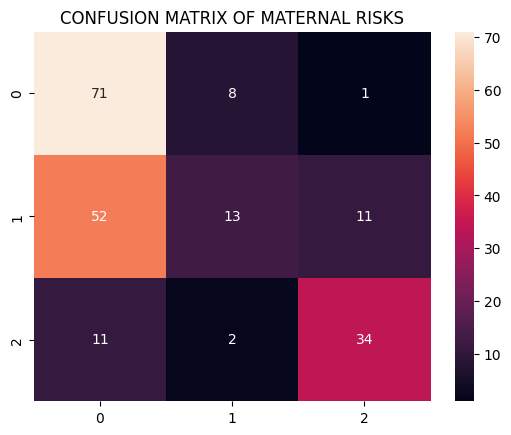

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d").set_title("CONFUSION MATRIX OF MATERNAL RISKS")
print(classification_report(y_test,y_pred))

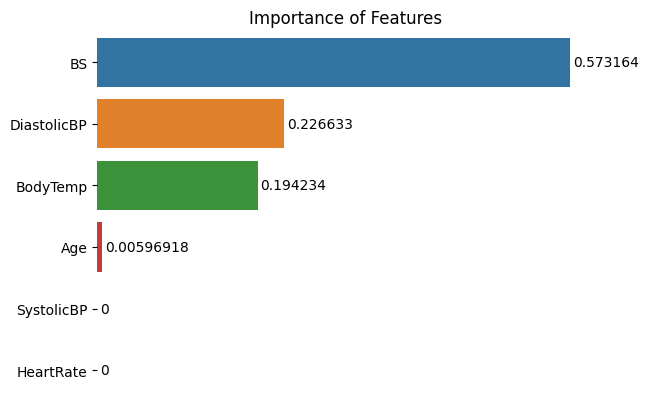

In [ ]:
featured_df = pd.DataFrame({'features': rfc.feature_names_in_,'importances': rfc.feature_importances_})

featured_df_sorted = featured_df.sort_values(by='importances',ascending=False)

g = sns.barplot(data = featured_df_sorted, x = 'importances',y='features')
sns.despine(bottom = True, left = True)
g.set_title('Importance of Features')
g.set(xlabel=None)
g.set(ylabel = None)
g.set(xticks=[])

for value in g.containers:
  g.bar_label(value,padding=2)

In [ ]:
y = df["BS"]
x = df.drop(["BS"],axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestClassifier(n_estimators=3, max_depth = 2, random_state = 42)